In [ ]:
!pip install NRCLex
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 5.0 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=e38cde35ab4b94db793db1df2b9cce6631914ef94c84f7d57aac2e0e70395573
  Stored in directory: /root/.cache/pip/wheels/83/95/c0/42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built NRCLex
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import numpy as np
import re
import nltk
import plotly.graph_objs as go
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from PIL import Image
from plotly import tools
from plotly.offline import init_notebook_mode,iplot,plot
from nrclex import NRCLex
from nltk.corpus import stopwords 
nltk.download('stopwords')
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/merge.csv')
df.head(5)

,Text,Label,ID
0,Saggy floppy piece of junk.,0.0,Amazon
1,horrible had to switch 3 times.,0.0,Amazon
2,Horrible horrible protector.,0.0,Amazon
3,For a product that costs as much as this one d...,0.0,Amazon
4,During several different 2 minute calls I expe...,0.0,Amazon


In [ ]:
df = df.head(6000)

In [ ]:
df.shape


(3010, 3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


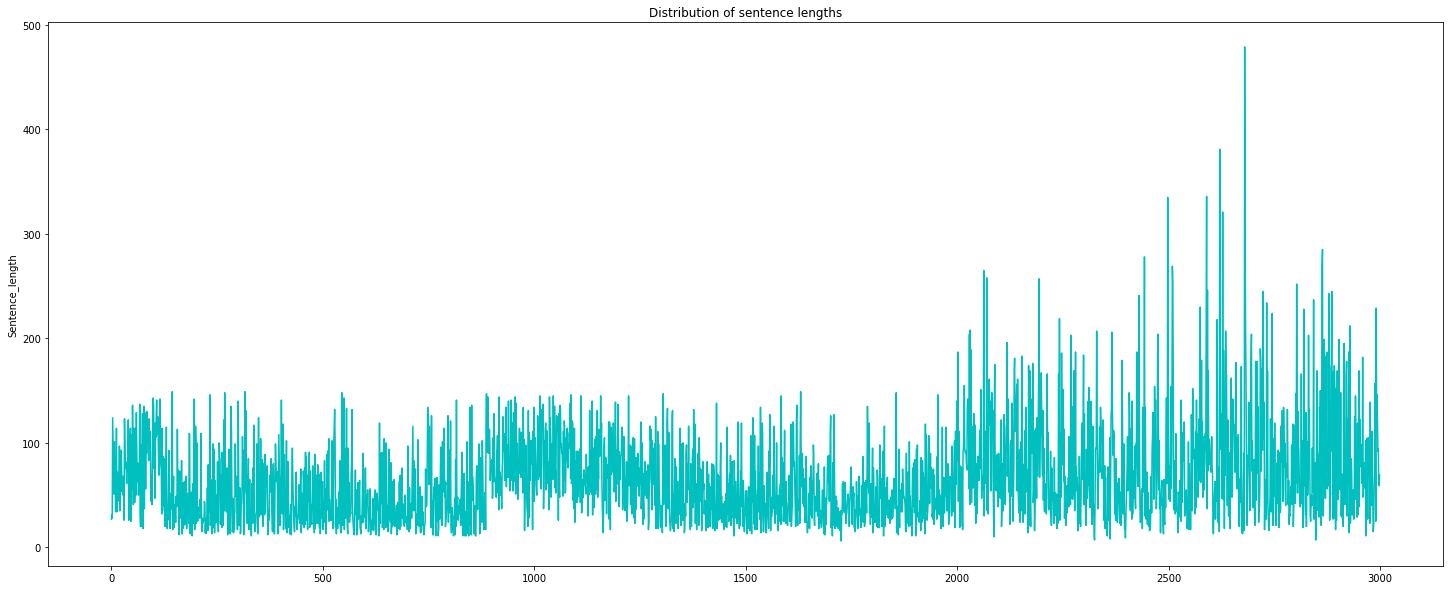

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt 

# plot distribution of sentence length
df['Sentence_length'] = [len(df.Text[i]) for i in range(3000)]
plt.figure(figsize =(25,10))
sns.lineplot(data=df['Sentence_length'],color ='c');
plt.title("Distribution of sentence lengths");
plt.savefig('lineplot.png')

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
description_list=[]
# remove stopwords
for description in df['Text']:
    description=re.sub("[^a-zA-Z]", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nltk.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)
df["Text_new"]=description_list
df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Text,Label,ID,Sentence_length,Text_new
0,Saggy floppy piece of junk.,0.0,Amazon,27,saggy floppy piece junk
1,horrible had to switch 3 times.,0.0,Amazon,31,horrible switch time
2,Horrible horrible protector.,0.0,Amazon,28,horrible horrible protector
3,For a product that costs as much as this one d...,0.0,Amazon,124,product cost much one expect work far better g...
4,During several different 2 minute calls I expe...,0.0,Amazon,100,several different minute call experienced drop...


In [ ]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
def text_cleaning(val_list):
    df1 = DataFrame(val_list,columns =['Text_new']).dropna() # remove missing values
    df1["Text_new"] = df1["Text_new"].str.replace(pat, '') # clean text_new
    df1["Text_new"] = df1["Text_new"].str.replace(r'\s+', ' ') # clean text_new
    return df1

In [ ]:
val_Amazon=[]
val_Yelp=[]
val_Imdb=[]

for i,row in df.iterrows():
    val = row['Text_new']
    if row['ID'] == "Amazon":
        val_Amazon.append(val)
    elif row['ID']== "Yelp":
        val_Yelp.append(val)
    elif row['ID'] == "Imdb":
        val_Imdb.append(val)

In [ ]:
Amazon = text_cleaning(val_Amazon)
Yelp = text_cleaning(val_Yelp)
Imdb = text_cleaning(val_Imdb)

<ipython-input-11-3a699e667d37>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-11-3a699e667d37>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
# create wordcloud
wc = WordCloud()
wc.generate(' '.join(Amazon['Text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(' '.join(Amazon['Text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def wordcloud(char,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(char['Text_new']))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
# get highest frequency word
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# get higest frequency bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# get higest frequency trigram
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
def plot(x,char,name,w,p):
    common_words = x(char['Text_new'], 20)
    common_words_df = DataFrame (common_words,columns=['word','freq'])

    plt.figure(figsize=(16, 10))
    sns.barplot(x='word', y='freq', data=common_words_df,palette=p)
    plt.title("Top 20 "+w+" used by "+name, fontsize=16)
    plt.ylabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90, fontsize=13)
    plt.xlabel("");

In [ ]:
common_words = get_top_n_words(Amazon['Text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
character_img = mpimg.imread('/content/amazon.png')
imagebox = OffsetImage(character_img, zoom=0.4)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(16, 140),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='cividis')
ax.add_artist(ab)

plt.title("Top 20 unigrams used in dataset of Amazon", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

NameError: ignored

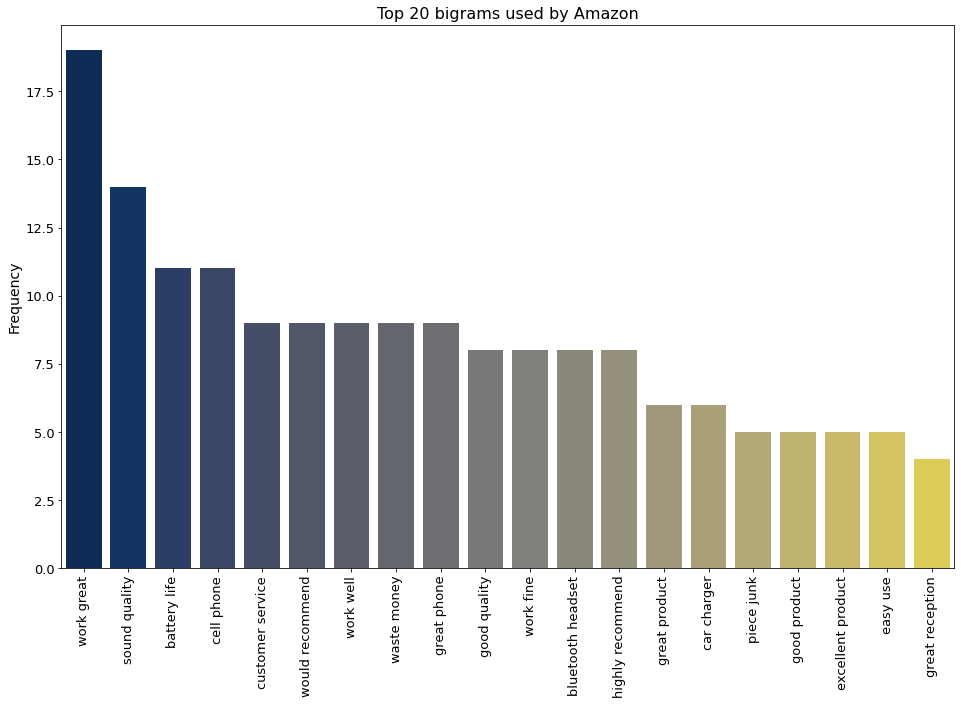

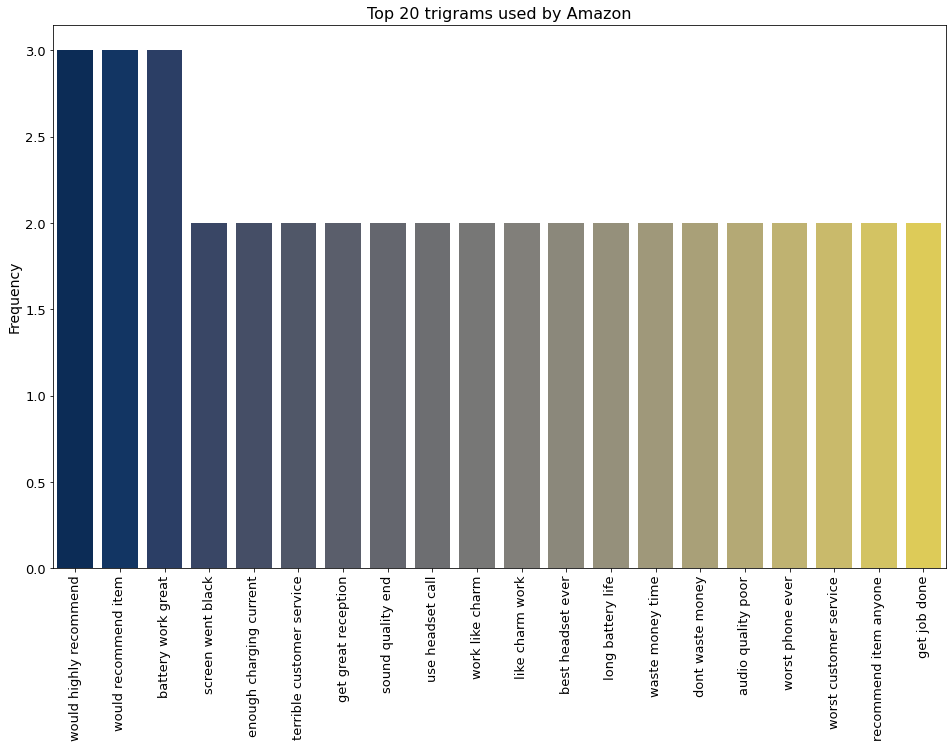

In [ ]:
plot(get_top_n_bigram,Amazon,"Amazon","bigrams",'cividis')
plot(get_top_n_trigram,Amazon,"Amazon","trigrams",'cividis')

In [ ]:
wordcloud(Yelp,'/content/Yelp.pn','white')

In [ ]:
common_words = get_top_n_words(Yelp['Text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
character_img = mpimg.imread('/content/Yelp.png')
imagebox = OffsetImage(character_img, zoom=0.2)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(16, 100),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='Reds')
ax.add_artist(ab)

plt.title("Top 20 unigrams used in dataset of Yelp", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

FileNotFoundError: ignored

In [ ]:
plot(get_top_n_bigram,Yelp,"Yelp","bigrams","Reds")
plot(get_top_n_trigram,Yelp,"Yelp","trigrams","Reds")

In [ ]:
wordcloud(Imdb,'/content/Imdb.png',"yellow")

In [ ]:
common_words = get_top_n_words(Imdb['Text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
character_img = mpimg.imread('/content/Imdb.png')
imagebox = OffsetImage(character_img, zoom=0.6)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(17, 150),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 7))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='YlGnBu')
ax.add_artist(ab)

plt.title("Top 20 unigrams used in dataset of Imdb", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");


In [ ]:
plot(get_top_n_bigram,Imdb,"Imdb","bigrams",'YlGnBu')
plot(get_top_n_trigram,Imdb,"Imdb","trigrams",'YlGnBu')


In [ ]:
df['Text_new']

0                                 saggy floppy piece junk
1                                    horrible switch time
2                             horrible horrible protector
3       product cost much one expect work far better g...
4       several different minute call experienced drop...
                              ...                        
2995    never condescends character good genuine heart...
2996    two main character may two believable child ev...
2997                         easy love even easy identify
2998              movie great especially enjoy visual art
2999      scenery two daughter paint photograph beautiful
Name: Text_new, Length: 3000, dtype: object

In [ ]:
# NRCLex to get emotion of each word
text_object = NRCLex(' '.join(df['Text_new']))

In [ ]:
text_object.affect_frequencies

{'fear': 0.06166636214142152,
 'anger': 0.06038735611182167,
 'anticip': 0.0,
 'trust': 0.12863146354832816,
 'surprise': 0.05609355015530788,
 'positive': 0.21350264936963273,
 'negative': 0.13539192399049882,
 'sadness': 0.06915768317193495,
 'disgust': 0.056641695596564956,
 'joy': 0.11748583957610086,
 'anticipation': 0.10104147633838845}

In [ ]:
text_object.top_emotions

[('positive', 0.21350264936963273)]

In [ ]:
sentiment_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items())) 

In [ ]:
sentiment_scores = sentiment_scores.rename(columns={0: "Sentiment", 1: "Count"})
print("sentiment score")
sentiment_scores

sentiment score


,Sentiment,Count
0,negative,1482
1,anger,661
2,disgust,620
3,fear,675
4,anticipation,1106
5,positive,2337
6,trust,1408
7,surprise,614
8,joy,1286
9,sadness,757


In [ ]:
text_object = NRCLex(' '.join(df['Text_new'].iloc[1001:2000]))

In [ ]:
text_object.top_emotions

In [ ]:
sentiment_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items())) 

In [ ]:
sentiment_scores = sentiment_scores.rename(columns={0: "Sentiment", 1: "Count"})
print("Yelp sentiment score")
sentiment_scores

In [ ]:
text_object.affect_frequencies

In [ ]:
text_object.top_emotions

In [ ]:
sentiment_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items())) 

In [ ]:
sentiment_scores = sentiment_scores.rename(columns={0: "Sentiment", 1: "Count"})
print("Amazon sentiment score")
sentiment_scores

In [ ]:
fig = px.pie(sentiment_scores, values='Count', names='Sentiment',
             title='Sentiment Scores',
             hover_data=['Sentiment'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
sentiment = sentiment_scores['Sentiment'].to_list()
sentiment

In [ ]:
sentiment_words = pd.DataFrame(list(text_object.affect_dict.items()),columns = ['words','sentiments'])
sentiment_words

In [ ]:
for y in sentiment:
    sentiment_words[y] = 9
sentiment_words

In [ ]:
a=0
for i in sentiment_words['sentiments']: 
    for y in sentiment:
        sentiment_words[y][a] = int(y in i)
    a=a+1
sentiment_words.head(5)

In [ ]:
sentiment_words.head(5)

In [ ]:
a=0
for i in sentiment_words['sentiments']: 
    for y in sentiment:
        sentiment_words[y][a] = int(y in i)
    a=a+1
sentiment_words.head(5)

In [ ]:
for y in sentiment:
    word_list = sentiment_words[sentiment_words[y]== 1].words.head(10)
    print(f"{y_}Sentiment:{y}")
    print(f"{r_}{word_list.values}\n")